In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import seagul.envs
from scipy.linalg import solve_discrete_are, solve,inv
from seagul.rl.ars import ARSAgent
import time

%load_ext autoreload
%autoreload 2

/home/sgillen/work/seagul/seagul/envs/__init__.py:56: UserWarning: Warning, pybullet envs not installed
  warnings.warn("Warning, pybullet envs not installed")
/home/sgillen/work/seagul/seagul/envs/__init__.py:150: UserWarning: Warning, rllib environments not registered
  warnings.warn("Warning, rllib environments not registered")


In [2]:
#env_config = {"A":np.random.randn(3,3)}
def get_optimal_time(env_config, n_trials=200):
    env = gym.make('linear-v0',**env_config)

    if np.all(env.A == np.identity(env.A.shape[0])):
        K = np.identity(env.A.shape[0])
    else:
        G = env.A
        H = np.identity(env.A.shape[0])
        Q = env.Q
        R = env.R
        P = solve_discrete_are(G, H, Q, R)  # Ricatti
        K = solve(H.T@P@H + R, H.T@P@G)     # (B^T P B + R)*K =  B^T P A 
    
    rew_list = []
    for t in range(n_trials):
        obs = []
        rew = []
        o = env.reset()
        for i in range(env.num_steps):
            a = -K@o
            o,r,_,_ = env.step(a)
            obs.append(o)
            rew.append(r)

        rew_list.append(sum(rew))
        
    return np.mean(rew_list)

    #print(f"optimal policy = {np.mean(rew_list)} +- {np.std(rew_list)}")

In [ ]:
n_list = [i for i in range(2,20)]
num_trials = 5
bad_list = []
mean_t_list = []
std_t_list = []
mean_step_list = []
std_step_list = [] 

max_steps = 5000

for n in n_list:
    t_list = [] 
    step_list = []
    
    env_config = {"A":np.identity(n),"num_steps":25, 'act_limit':1}
    optimal_reward = get_optimal_time(env_config)

    for trial in range(num_trials):
        print(f"n = {n}, opt = {optimal_reward}")
        start = time.time()
        agent = ARSAgent('linear-v0',seed=trial, n_workers=16, env_config=env_config, 
                         reward_stop = 1.1*optimal_reward, step_schedule=[.05,.001], exp_schedule=[.05, .001],
                         n_delta = 64)
        agent.learn(max_steps);
        if len(agent.lr_hist) == max_steps:
            bad_list.append(n)
            
        
        t_list.append(start - time.time())
        step_list.append(len(agent.lr_hist))
        
    mean_t_list.append(np.mean(t_list))
    std_t_list.append(np.std(t_list))
    
    mean_step_list.append(np.mean(step_list))
    std_step_list.append(np.std(step_list))

n = 2, opt = -13.808941750850085
0 : mean return: -2429.0083666398914, top_return: -66.32844818830793, fps:90274.23600627756
10 : mean return: -139.3732186611213, top_return: -0.42308758024311144, fps:141740.4723276098
n = 2, opt = -13.808941750850085
0 : mean return: -1711.82050425281, top_return: -145.63692454785544, fps:97568.87211830352
10 : mean return: -174.17758855565665, top_return: -0.1410388940928098, fps:146268.63861476054
n = 2, opt = -13.808941750850085
0 : mean return: -2036.2622406490743, top_return: -150.0118580706815, fps:104455.61513850057
10 : mean return: -177.77860296994976, top_return: -0.2596039972479111, fps:140125.0362407803
20 : mean return: -67.63401821139755, top_return: -15.49841553410574, fps:138663.96227173155
n = 2, opt = -13.808941750850085
0 : mean return: -2659.0532029904143, top_return: -113.37865844222199, fps:108474.19104848425
10 : mean return: -136.14421906256143, top_return: -0.6000172893615908, fps:137638.29450415893
n = 2, opt = -13.8089417508

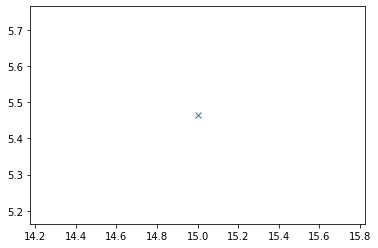

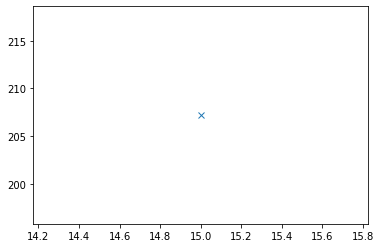

In [12]:
plt.plot(n_list,  -1*np.array(mean_t_list),'x-')
plt.figure()
plt.plot(n_list, mean_step_list,'x-')

In [6]:
obs = []
rew = []
env_config = {"A":np.identity(50),"num_steps":25, 'act_limit':1}
env = gym.make('linear-v0',**env_config)

for i in range(env.num_steps):
    a ,_,_,_= agent.model.step(o)
    o,r,_,_ = env.step(a)
    obs.append(o)
    rew.append(r)

obs = np.array(obs)
print(sum(rew))
plt.plot(obs)
plt.figure()
plt.plot(rew)

NameError: name 'agent' is not defined

In [23]:
del mean_t_list[2]
del mean_step_list[2]

In [ ]:
import control
control.__version__

In [16]:
n = 40
env_config = {"A":np.identity(n),"num_steps":25, 'act_limit':1}
env_config["A"] = np.identity(n)
env = gym.make('linear-v0',**env_config)

In [17]:
G = env.A
H = np.identity(env.A.shape[0])
Q = env.Q
R = env.R
P = solve_discrete_are(G, H, Q, R)  # Ricatti
K = solve(H.T@P@H + R, H.T@P@G)     # (B^T P B + R)*K =  B^T P A 

-163.28721012668564


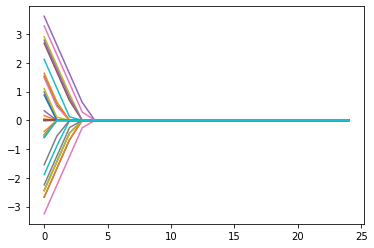

In [18]:
rew_list = []
obs = []
rew = []
o = env.reset()
for i in range(env.num_steps):
    a = -np.identity(n)@o
    o,r,_,_ = env.step(a)
    obs.append(o)
    rew.append(r)

print(sum(rew))
plt.plot(obs);